In [2]:
# importing the dependencies
import tensorflow as tf
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import random
import cv2 as cv
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
%matplotlib inline

2021-07-19 11:22:30.048408: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-19 11:22:30.048465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


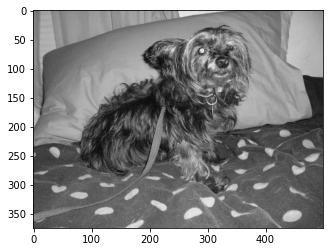

In [12]:
# Data preparation
DATADIR='/media/suman/649EF25A9EF223E8/Machine Learning/Deep learning Algorithms/kagglecatsanddogs/PetImages'
categories=['Dog','Cat']
for category in categories:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break


In [13]:
img_array.shape

(375, 500)

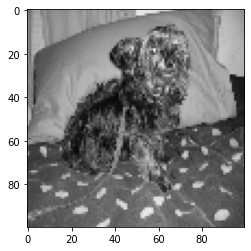

In [14]:
Img_size=100
new_array=cv.resize(img_array,(Img_size,Img_size))
plt.imshow(new_array,cmap='gray')

In [15]:
training_data=[]
def create_training_data():
  for category in categories:
    path=os.path.join(DATADIR,category)
    class_num=categories.index(category)
    for img in os.listdir(path):
        try:
            img_array=cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
            new_array=cv.resize(img_array,(Img_size,Img_size))
            training_data.append([new_array,class_num])
        except Exception as e:
            pass
create_training_data()

       


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


In [16]:
print(len(training_data))

24946


In [17]:
import random
random.shuffle(training_data)
for sample in training_data[:2]:
    print(sample[0])
    

[[79 73 70 ... 18 57 85]
 [82 79 80 ...  7 57 81]
 [81 83 85 ... 18 63 84]
 ...
 [48 55 59 ... 24 49 69]
 [47 52 56 ... 33 47 70]
 [44 49 55 ... 36 49 64]]
[[ 96 101  17 ...  84  51  85]
 [ 83 100  18 ...  58  71  85]
 [ 66 104  35 ...  44  89  81]
 ...
 [102 140 154 ... 139 125 135]
 [120 147 152 ... 130 137 141]
 [134 154 155 ... 144 144 143]]


In [18]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.array(x).reshape(-1,Img_size,Img_size,1)
import pickle

pickle_out=open('X.pickle','wb')
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open('y.pickle','wb')
pickle.dump(y,pickle_out)
pickle_out.close()


In [19]:
type(x)

numpy.ndarray

In [20]:
pickle_in=open('X.pickle','rb')
X=pickle.load(pickle_in)

In [21]:
type(X)

numpy.ndarray

In [3]:
X=pickle.load(open("X.pickle","rb"))
Y=pickle.load(open("y.pickle","rb"))
X=np.array(X)
Y=np.array(Y)
X=X/255.0

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2021-07-19 11:22:34.667375: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-19 11:22:34.738962: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-19 11:22:34.739007: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sumangole): /proc/driver/nvidia/version does not exist
2021-07-19 11:22:34.739688: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
type(X)

numpy.ndarray

In [5]:
model.fit(x=X,y=Y,epochs=5,batch_size=32,validation_split=0.1)

2021-07-19 11:22:39.327900: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 898040000 exceeds 10% of free system memory.
2021-07-19 11:22:39.705352: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-19 11:22:39.727306: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 1800000000 Hz


Epoch 1/5
702/702 [==============================] - 183s 259ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.4974
Epoch 2/5
702/702 [==============================] - 183s 260ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.4974
Epoch 3/5
702/702 [==============================] - 182s 260ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.4974
Epoch 4/5
702/702 [==============================] - 182s 260ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.4974
Epoch 5/5
702/702 [==============================] - 186s 265ms/step - loss: 0.0000e+00 - accuracy: 0.5004 - val_loss: 0.0000e+00 - val_accuracy: 0.4974
